In [ ]:
pip install matplotlib

In [ ]:
pip install tensorflow

In [ ]:
!pip uninstall scikit-learn

In [ ]:
!pip uninstall scikit-learn

In [ ]:
!python -m pip install --upgrade pip setuptools wheel

In [ ]:
!pip install --only-binary :all: numpy scipy

In [ ]:
!pip install --only-binary :all: scikit-learn

In [ ]:
!pip3 install -U scikit-learn scipy matplotlib

In [60]:
# INITIALIZATION OF CERTAIN VARIABLES (verplicht runnen)
import os

# root folder
afstudeerProjectRoot="C:/Users/jkharpatoe/Documents/Afstudeer/AFSTUDEER_MOBILENETV3/"

# paths
modelKerasPath = afstudeerProjectRoot + "mobilenet_models/"
modelTFLitePath = afstudeerProjectRoot + "mobilenet_models_tflite/"
collectedButterflyImagesPath= afstudeerProjectRoot + "collected_butterfly_images/"
trainingAndValidationDatasetFolder ="training_and_validation_data/"
modelTrainingLogsPath= afstudeerProjectRoot + "model_training_logs/"
testButterflyImages = afstudeerProjectRoot + "test_images"
testCopyButterflyImages = afstudeerProjectRoot + "test_images_copy"
confusionMatricesImagesPath = afstudeerProjectRoot + "confusion_matrices"

# CREATE TARGET FOLDER
target_folder = afstudeerProjectRoot + trainingAndValidationDatasetFolder
existDataSetPath = os.path.exists(target_folder)

if not existDataSetPath:
  os.mkdir(target_folder)
  print("Target folder created")
else:
  print("Target folder already exists, will not create it!")

Target folder already exists, will not create it!


In [61]:
# NECESSARY FUNCTIONS FOR FOLDERS (verplicht runnen)
import os
import shutil
from pathlib import Path

# put a directory. if it does not exist, this function will create it
def check_and_create_folder(folder_path):

  if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Map '{folder_path}' is created.")
  else:
    print(f"Map '{folder_path}' already exists.")

def get_all_folders_in_directory(directory_path: str) -> list:
# Initialize an empty list to hold the folder paths
    folder_paths = []

    # List all items in the current directory
    for item in os.listdir(directory_path):
        full_path = os.path.join(directory_path, item)

        # Check if the item is a directory (exclude files)
        if os.path.isdir(full_path):
            print('Folder selected: ' + item)
            folder_paths.append(full_path)

    return folder_paths

def get_categories_butterfly(directory_path: str) -> list:
    butterfly_categories=[]
    folders = get_all_folders_in_directory(directory_path)
    for folder in folders:
        butterfly_categories.append(os.path.basename(os.path.normpath(folder)))
    return butterfly_categories

def remove_unwanted_dir(path, unwanted_dirs):
      for unwanted_dir in unwanted_dirs:
        dir_path = os.path.join(path, unwanted_dir)
        if os.path.exists(dir_path) and os.path.isdir(dir_path):
            shutil.rmtree(dir_path)
            print(f"Removed directory: {dir_path}")

In [62]:
# DATA PROCESSING PROCESS STARTS HERE
# In deze code worden de categories verzamelt. Deze worden gehaald adv

import os
import random
import shutil

categories = []

categories = get_categories_butterfly(collectedButterflyImagesPath)
print(categories)

# Sort and print categories
categories.sort()
print(categories)


Folder selected: Danaus eresimus
Folder selected: Danaus plexippus
Folder selected: Heliconius antiochus
Folder selected: Heliopetes arsalte
['Danaus eresimus', 'Danaus plexippus', 'Heliconius antiochus', 'Heliopetes arsalte']
['Danaus eresimus', 'Danaus plexippus', 'Heliconius antiochus', 'Heliopetes arsalte']


In [63]:
# SPLIT THE DATA IN TRAIN AND VALIDATION (not testing)
# HIER WORDT DATA VANUIT DE SOURCE ('augmented_butterfly_images' folder) GEBRACHT
# NAAR DE TARGET FOLDER ('dataset_for_model')
splitsize = 0.80
def split_data(SOURCES, TRAINING, VALIDATION, SPLIT_SIZE):
  files=[]
  for SOURCE in SOURCES:
    for file_name in os.listdir(SOURCE):
      file_dir = SOURCE + file_name
      # print(file)

      if os.path.getsize(file_dir) > 0 :
        print("file dir: "+ file_dir)
        files.append(file_dir)
      else:
        print(file_dir + " is 0 length , ignore it")

  trainings_length = int(len(files) * SPLIT_SIZE) # 0.80 van de files wordt als training data gebruikt
  print("trainingsLength: "+ str(trainings_length))
  shuffle_set = random.sample(files, len(files))
  training_set = shuffle_set[0:trainings_length]
  valid_set = shuffle_set[trainings_length:]

  # copy the train images

  for file_dir in training_set:
    filename = os.path.basename(file_dir)
    destination = TRAINING + filename
    # print("Copying training data..")
    shutil.copyfile(file_dir,destination)
    # print("Copying training data FINISHED")

  # copy the validation images

  for file_dir in valid_set:
    filename = os.path.basename(file_dir)
    destination = VALIDATION + filename
    # print("Copying validation data..")
    shutil.copyfile(file_dir,destination)
    # print("Copying validation data FINISHED")

# buiten function

trainPath = target_folder +"/train"
validatePath = target_folder +"/validate"

# create the target folder
existDataSetPth = os.path.exists(trainPath)
if existDataSetPth==False:
  os.mkdir(trainPath)

existDataSetPth = os.path.exists(validatePath)
if existDataSetPth==False:
  os.mkdir(validatePath)

# lets run the function for each of the folders

for category in categories:
  trainDestPath = trainPath + "/" + category
  validateDestPath = validatePath + "/" + category

  if os.path.exists(trainDestPath)==False:
    os.mkdir(trainDestPath)
  if os.path.exists(validateDestPath)==False:
    os.mkdir(validateDestPath)

  sourcepaths = []

  originalDatasetCategoryPath = collectedButterflyImagesPath + "/" + category + "/"

  sourcepaths.append(originalDatasetCategoryPath)

  trainDestPath = trainDestPath + "/"
  validateDestPath = validateDestPath + "/"

  split_data(sourcepaths , trainDestPath, validateDestPath,splitsize)

  # Utility function to remove unwanted directories

remove_unwanted_dir(trainPath, ['.ipynb_checkpoints'])
remove_unwanted_dir(validatePath, ['.ipynb_checkpoints'])

file dir: C:/Users/jkharpatoe/Documents/Afstudeer/AFSTUDEER_MOBILENETV3/collected_butterfly_images//Danaus eresimus/Danaus-eresimus-eresimus_lljohnson_cc-by-nc_3961268_0.jpeg
file dir: C:/Users/jkharpatoe/Documents/Afstudeer/AFSTUDEER_MOBILENETV3/collected_butterfly_images//Danaus eresimus/Danaus-eresimus-montezuma_adorantes_none_2612492_0.jpeg
file dir: C:/Users/jkharpatoe/Documents/Afstudeer/AFSTUDEER_MOBILENETV3/collected_butterfly_images//Danaus eresimus/Danaus-eresimus-montezuma_adorantes_none_2612496_0.jpeg
file dir: C:/Users/jkharpatoe/Documents/Afstudeer/AFSTUDEER_MOBILENETV3/collected_butterfly_images//Danaus eresimus/Danaus-eresimus-montezuma_adorantes_none_3268838_0.jpeg
file dir: C:/Users/jkharpatoe/Documents/Afstudeer/AFSTUDEER_MOBILENETV3/collected_butterfly_images//Danaus eresimus/Danaus-eresimus-montezuma_adorantes_none_3268838_1.jpeg
file dir: C:/Users/jkharpatoe/Documents/Afstudeer/AFSTUDEER_MOBILENETV3/collected_butterfly_images//Danaus eresimus/Danaus-eresimus-monte

In [ ]:
# NIET ZOMAAR RUNNEN
# Code om uit afbeeldingen testdata te halen
import os
import random
import shutil

def create_test_image_structure(src_dir, dest_dir, num_images):
    """
    Creates a duplicate folder structure from the source directory in the destination directory,
    containing a specified number of randomly selected images from each subfolder.

    Parameters:
    src_dir (str): Path to the source directory containing subfolders with images.
    dest_dir (str): Path to the destination directory where the duplicate structure will be created.
    num_images (int): Number of images to copy from each subfolder.
    """
    # Walk through the source directory
    for root, dirs, files in os.walk(src_dir):
        # Filter image files
        image_files = [file for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Skip if no images are found in this folder
        if not image_files:
            continue

        # Randomly select images
        selected_images = random.sample(image_files, min(num_images, len(image_files)))

        # Compute relative path and create corresponding folder in destination
        relative_path = os.path.relpath(root, src_dir)
        dest_folder = os.path.join(dest_dir, relative_path)
        os.makedirs(dest_folder, exist_ok=True)

        # Copy selected images to the destination folder
        for image in selected_images:
            src_image_path = os.path.join(root, image)
            dest_image_path = os.path.join(dest_folder, image)
             # Move the file instead of copying
            shutil.move(src_image_path, dest_image_path)
            print(f"Moved {src_image_path} to {dest_image_path}")

# Number of test images to copy per subfolder
number_of_test_images = 5

create_test_image_structure(collectedButterflyImagesPath, testButterflyImages, number_of_test_images)

In [ ]:
# FUNCTIONS TO BE USED IN THE FOLLOWING CODES
import os
import glob
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
def classify_image(imageFile):
  x = []
  img = Image.open(imageFile)

  img.load()
  img = img.resize((320,320))

  x = image.img_to_array(img)
  x= np.expand_dims(x, axis = 0)

  print(x.shape)

  pred = model.predict(x)
  print(pred * 100)

  category_value = np.argmax(pred, axis=1)
  category_value = category_value[0]

  print(category_value)

  result = categories[category_value]

  return result

def classify_image_with_entropicscore(imageFile):
  x = []
  img = Image.open(imageFile)

  img.load()
  img = img.resize((320,320))

  x = image.img_to_array(img)
  x= np.expand_dims(x, axis = 0)


  pred = model.predict(x)

  categoryValue = np.argmax(pred, axis=1)
  categoryValue = categoryValue[0]

  print(categoryValue)

  result = categories[categoryValue]
   # Calculate entropy and entropic score
  entropy = -tf.reduce_sum(pred * tf.math.log(pred + 1e-8), axis=1)
  entropic_score = -entropy

  print(f"Entropic Score of {result}: {entropic_score.numpy()[0]}")

  for output in pred:
      for outputty in output:
          print(f"Prediction: {outputty * 100:.2f}%")

  categoryValue1 = np.argmax(pred, axis=1)[0]
  print(f"Predicted category index: {categoryValue1}", end='\n\n')

  return result



def get_last_modified_model(folder_path: str) -> str:
    # Get all .keras and .tflite files in the folder
    keras_files = glob.glob(os.path.join(folder_path, '*.keras'))
    tflite_files = glob.glob(os.path.join(folder_path, '*.tflite'))

    # Combine both file lists
    files = keras_files + tflite_files

    if not files:
        return None  # No files in the folder

    # Sort files by modification time (latest first)
    latest_file = max(files, key=os.path.getmtime)

    return latest_file

Found 1600 files belonging to 4 classes.
Found 200 files belonging to 4 classes.
Map 'C:/Users/jkharpatoe/Documents/Afstudeer/AFSTUDEER_MOBILENETV3/model_training_logs/' already exists.
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 7, 7, 960)         2996352   
 al)                                                             
                                                                 
 global_average_pooling2d_2  (None, 960)               0         
 7 (GlobalAveragePooling2D)                                      
                                                                 
 dense_54 (Dense)            (None, 256)               246016    
                                                                 
 dense_55 (Dense)            (None, 4)                 1028      
                                                                 

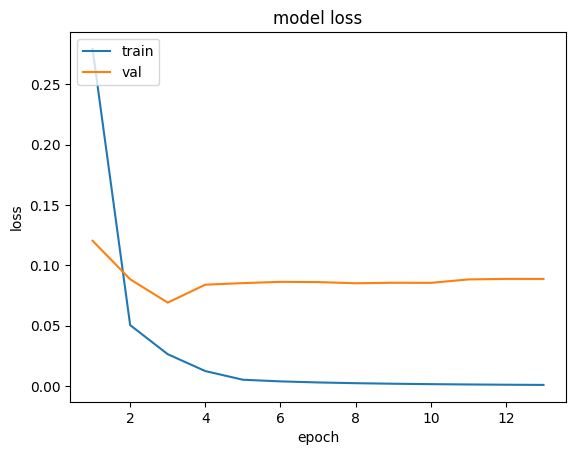

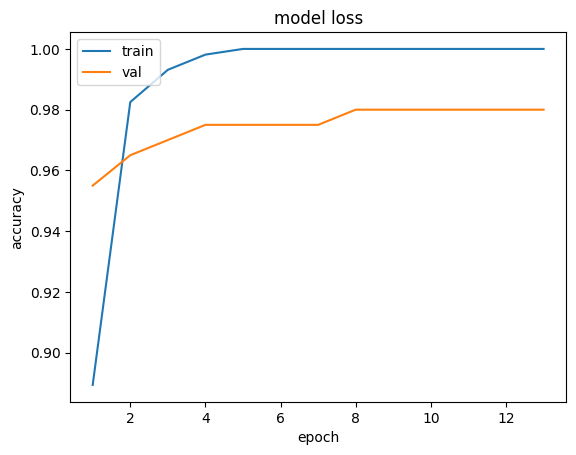

File 'C:/Users/jkharpatoe/Documents/Afstudeer/AFSTUDEER_MOBILENETV3/mobilenet_models/__2025-04-20_02_20.keras' does not exist.
INFO:tensorflow:Assets written to: C:\Users\JKHARP~1\AppData\Local\Temp\tmpoln2z27a\assets


INFO:tensorflow:Assets written to: C:\Users\JKHARP~1\AppData\Local\Temp\tmpoln2z27a\assets


INFO: Assets written to: C:\Users\JKHARP~1\AppData\Local\Temp\tmpoln2z27a\assets
Model converted successfully.
File 'C:/Users/jkharpatoe/Documents/Afstudeer/AFSTUDEER_MOBILENETV3/mobilenet_models_tflite/__2025-04-20_02_20.tflite' does not exist.


In [64]:
# Feature Extraction method
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import shutil
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K
import datetime
from tensorflow.keras import models, layers


numberOfClasses = len(categories)

validateImagesPath = afstudeerProjectRoot + trainingAndValidationDatasetFolder + "validate/"
trainImagesPath = afstudeerProjectRoot + trainingAndValidationDatasetFolder + "train/"

# Laad dataset met ingebouwde validatie-split
train_ds = tf.keras.utils.image_dataset_from_directory(
    trainImagesPath,
    image_size=(224, 224),
    # validation_split=0.2,
    # subset='training',
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    validateImagesPath,
    image_size=(224, 224),
    # validation_split=0.2,
    # subset='validation',
    seed=123
)

# %load_ext tensorboard
# %reload_ext tensorboard

check_and_create_folder(modelTrainingLogsPath)

if os.path.exists(modelTrainingLogsPath):
    shutil.rmtree(modelTrainingLogsPath)  # Deletes the directory and all its contents
    os.mkdir(modelTrainingLogsPath)


base_model_mobilenetv3large = MobileNetV3Large(weights='imagenet', include_top=False, input_shape =(224, 224, 3)) #nergens in de literatuur is de input_shape verandert


# Freeze all layers of the base model
for layer in base_model_mobilenetv3large.layers:
    layer.trainable = False

# Add classification layers volgens ene paper gedaan (Feature Extraction)
model_mobilenetv3large = models.Sequential([
    base_model_mobilenetv3large,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(numberOfClasses, activation='softmax')
])


print(model_mobilenetv3large.summary())

AUTOTUNE = tf.data.AUTOTUNE

# # Configure data augmentation
# data_augmentation = tf.keras.Sequential([
#          # Randomly flip images horizontally and vertically
#         layers.RandomFlip("horizontal_and_vertical"),

#         # Randomly rotate images by up to 40 degrees
#         # 40 degrees is 40/360 = 1/9th of a full circle (2*pi radians)
#         layers.RandomRotation(factor=(40/360)),

#         # Randomly translate images horizontally and vertically
#         # by up to 20% of the image's width and height
#         layers.RandomTranslation(height_factor=0.2, width_factor=0.2),

#         # Randomly zoom images. The range (-0.2, 0.2) corresponds to
#         # zooming out to 80% or zooming in to 120% of the original size.
#         layers.RandomZoom(height_factor=(-0.2, 0.2)),
# ])

# # Apply data augmentation to the training dataset

# train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#Toepassing earlystopping, model zal stoppen met trainen na 10 epochs van geen improvement
earlyStoppingCallback = EarlyStopping(
    patience=10
)

# Compile

model_mobilenetv3large.compile(loss = "sparse_categorical_crossentropy",
              optimizer='adam', metrics=['accuracy']) # metrics accuracy kan ik later voor mezelf

#train
#Veranderen, gewoon de images in folders zetten en dat gebruiken liever

history = model_mobilenetv3large.fit(train_ds, validation_data=val_ds, epochs=100,callbacks=[earlyStoppingCallback])


print(history.history)

# Bepaal het aantal epochs waarvoor getraind is
epochs_trained = len(history.history['loss'])
# Maak een reeks van epoch nummers (bijv. [1, 2, 3, 4])
epoch_range = range(1, epochs_trained + 1)

# Plot de loss waarden tegen de epoch nummers
plt.plot(epoch_range, history.history['loss'], label='training loss')
plt.plot(epoch_range, history.history['val_loss'], label='validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot de accuracy waarden tegen de epoch nummers
plt.plot(epoch_range, history.history['accuracy'], label='training accuracy')
plt.plot(epoch_range, history.history['val_accuracy'], label='validation accuracy')
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

currentTime = datetime.datetime.now()

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")

modelSavedPath = modelKerasPath + f'__{modelDateTrained}.keras'

try:
    os.remove(modelSavedPath)
    print(f"File '{modelSavedPath}' has been removed.")
except FileNotFoundError:
    print(f"File '{modelSavedPath}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{modelSavedPath}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")

#save the keras model
model_mobilenetv3large.save(modelSavedPath)

model= tf.keras.models.load_model(modelSavedPath)

# Converting to TF lite
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    model_mobilenetv3large_tflite = converter.convert()
    print("Model converted successfully.")
except Exception as e:
    print(f"Error during conversion: {e}")

currentTime = datetime.datetime.now()

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")

model_mobilenetv3large_tflite_path = modelTFLitePath + f'__{modelDateTrained}.tflite'

try:
    os.remove(model_mobilenetv3large_tflite_path)
    print(f"File '{model_mobilenetv3large_tflite_path}' has been removed.")
except FileNotFoundError:
    print(f"File '{model_mobilenetv3large_tflite_path}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{model_mobilenetv3large_tflite_path}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")

# Save the tf-lite model.
with open(model_mobilenetv3large_tflite_path, 'wb') as f:
  f.write(model_mobilenetv3large_tflite)

In [ ]:
# Feature Extraction method
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import shutil
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K
import datetime
from tensorflow.keras import models, layers


numberOfClasses = len(categories)

validateImagesPath = afstudeerProjectRoot + trainingAndValidationDatasetFolder + "validate/"
trainImagesPath = afstudeerProjectRoot + trainingAndValidationDatasetFolder + "train/"

# Laad dataset met ingebouwde validatie-split
train_ds = tf.keras.utils.image_dataset_from_directory(
    trainImagesPath,
    image_size=(224, 224),
    # validation_split=0.2,
    # subset='training',
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    validateImagesPath,
    image_size=(224, 224),
    # validation_split=0.2,
    # subset='validation',
    seed=123
)

# %load_ext tensorboard
# %reload_ext tensorboard

check_and_create_folder(modelTrainingLogsPath)

if os.path.exists(modelTrainingLogsPath):
    shutil.rmtree(modelTrainingLogsPath)  # Deletes the directory and all its contents
    os.mkdir(modelTrainingLogsPath)


4 # Load pre-trained MobileNetV3Large model without the top classification layer 15 
base_model_mobilenetv3large = MobileNetV3Large(weights='imagenet', include_top=False, input_shape =(224, 224, 3))  

# Unfreeze the last few layers for fine-tuning
for layer in base_model_mobilenetv3large.layers[-20:]:
    layer.trainable = True  

# Add classification layers 
model_mobilenetv3large = models.Sequential([
    base_model_mobilenetv3large,
    layers.GlobalAveragePooling2D(), 
    layers.Dense(256, activation='relu'), 
    layers.Dense(10, activation='softmax')
])


print(model_mobilenetv3large.summary())

AUTOTUNE = tf.data.AUTOTUNE

# # Configure data augmentation
# data_augmentation = tf.keras.Sequential([
#          # Randomly flip images horizontally and vertically
#         layers.RandomFlip("horizontal_and_vertical"),

#         # Randomly rotate images by up to 40 degrees
#         # 40 degrees is 40/360 = 1/9th of a full circle (2*pi radians)
#         layers.RandomRotation(factor=(40/360)),

#         # Randomly translate images horizontally and vertically
#         # by up to 20% of the image's width and height
#         layers.RandomTranslation(height_factor=0.2, width_factor=0.2),

#         # Randomly zoom images. The range (-0.2, 0.2) corresponds to
#         # zooming out to 80% or zooming in to 120% of the original size.
#         layers.RandomZoom(height_factor=(-0.2, 0.2)),
# ])

# # Apply data augmentation to the training dataset

# train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#Toepassing earlystopping, model zal stoppen met trainen na 10 epochs van geen improvement
earlyStoppingCallback = EarlyStopping(
    patience=10
)

# Compile

model_mobilenetv3large.compile(loss = "sparse_categorical_crossentropy",
              optimizer='adam', metrics=['accuracy']) # metrics accuracy kan ik later voor mezelf

#train
#Veranderen, gewoon de images in folders zetten en dat gebruiken liever

history = model_mobilenetv3large.fit(train_ds, validation_data=val_ds, epochs=100,callbacks=[earlyStoppingCallback])


print(history.history)

# Bepaal het aantal epochs waarvoor getraind is
epochs_trained = len(history.history['loss'])
# Maak een reeks van epoch nummers (bijv. [1, 2, 3, 4])
epoch_range = range(1, epochs_trained + 1)

# Plot de loss waarden tegen de epoch nummers
plt.plot(epoch_range, history.history['loss'], label='training loss')
plt.plot(epoch_range, history.history['val_loss'], label='validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot de accuracy waarden tegen de epoch nummers
plt.plot(epoch_range, history.history['accuracy'], label='training accuracy')
plt.plot(epoch_range, history.history['val_accuracy'], label='validation accuracy')
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

currentTime = datetime.datetime.now()

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")

modelSavedPath = modelKerasPath + f'__{modelDateTrained}.keras'

try:
    os.remove(modelSavedPath)
    print(f"File '{modelSavedPath}' has been removed.")
except FileNotFoundError:
    print(f"File '{modelSavedPath}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{modelSavedPath}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")

#save the keras model
model_mobilenetv3large.save(modelSavedPath)

model= tf.keras.models.load_model(modelSavedPath)

# Converting to TF lite
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    model_mobilenetv3large_tflite = converter.convert()
    print("Model converted successfully.")
except Exception as e:
    print(f"Error during conversion: {e}")

currentTime = datetime.datetime.now()

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")

model_mobilenetv3large_tflite_path = modelTFLitePath + f'__{modelDateTrained}.tflite'

try:
    os.remove(model_mobilenetv3large_tflite_path)
    print(f"File '{model_mobilenetv3large_tflite_path}' has been removed.")
except FileNotFoundError:
    print(f"File '{model_mobilenetv3large_tflite_path}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{model_mobilenetv3large_tflite_path}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")

# Save the tf-lite model.
with open(model_mobilenetv3large_tflite_path, 'wb') as f:
  f.write(model_mobilenetv3large_tflite)

Found 1600 files belonging to 4 classes.
Found 200 files belonging to 4 classes.
Map 'C:/Users/jkharpatoe/Documents/Afstudeer/AFSTUDEER_MOBILENETV3/model_training_logs/' already exists.
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 7, 7, 960)         2996352   
 al)                                                             
                                                                 
 global_average_pooling2d_2  (None, 960)               0         
 8 (GlobalAveragePooling2D)                                      
                                                                 
 dense_56 (Dense)            (None, 256)               246016    
                                                                 
 dense_57 (Dense)            (None, 10)                2570      
                                                                 

Found 207 files belonging to 6 classes.
7/7 [==============================] - 6s 654ms/step
y_pred_probabilities
[[8.0923176e-01 1.9072570e-01 1.1394275e-05 8.8817696e-06 1.0712192e-05
  1.1597497e-05]
 [9.9863964e-01 1.3519952e-03 3.5947985e-06 2.0122557e-06 1.2872935e-06
  1.4492158e-06]
 [9.1350931e-01 8.6464331e-02 6.3915877e-07 2.5415532e-06 4.3889104e-06
  1.8760185e-05]
 ...
 [9.9865902e-06 3.2553421e-06 6.9358592e-08 2.5805443e-06 7.1824502e-07
  9.9998343e-01]
 [6.8007590e-05 2.2068181e-05 1.8934193e-06 4.8763057e-05 1.5127189e-06
  9.9985766e-01]
 [8.3729727e-03 9.0405687e-05 1.5895725e-04 2.0433634e-03 8.2644656e-05
  9.8925167e-01]]
y_pred
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 5 5 5 1 0 0 5 0 1 0 0 1 0 0 0 1 0 5 1 1 5 1 0 5 5 5 0 1 0 3 0 3 3 3 0 0 3
 0 3 3 0 3 5 0 0 5 0 0 0 3 3 0 0 3 0 3 0 3 3 3 3 0 3 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 

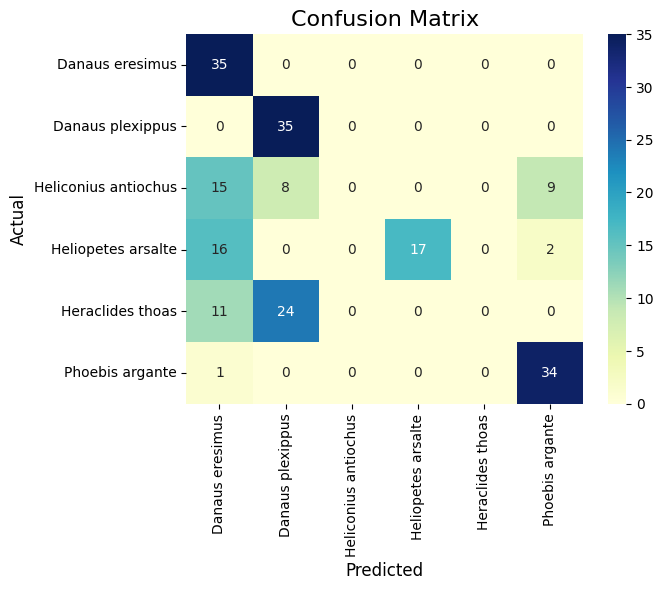

In [47]:
# Confusion Matrix voor Tensorflow Keras model (ziet er goed uit?)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# Maakt een x,y dataset.
# TODO: maak een aparte test dataset
test_ds_for_predictions = tf.keras.utils.image_dataset_from_directory(
    testButterflyImages,
    image_size=(224, 224),
    shuffle=False,  # Belangrijk voor consistente volgorde
    batch_size=32
)

model_path= get_last_modified_model(modelKerasPath)

model_mobilenetv3large= tf.keras.models.load_model(model_path)

y_pred_probabilities = model_mobilenetv3large.predict(test_ds_for_predictions) #hier gebruikt het x en y, nagaan of het correct is om hier ook labels te gebruiken. Je zou eig. alleen invoer images (x) moeten gebruiken.
print("y_pred_probabilities")
print(y_pred_probabilities)

# geeft per voorspelde afbeelding de hoogste prediction (in label/index waarde)
y_pred = np.argmax(y_pred_probabilities, axis=1)
print("y_pred")
print(y_pred)

# Verzamel de werkelijke labels
true_labels = np.concatenate([y for _, y in test_ds_for_predictions], axis=0)
print("true_labels")
print(true_labels)

# Maak de confusion matrix
cm = confusion_matrix(true_labels, y_pred)

# Visualiseer de confusion matrix met schuine labels
class_names = list(categories)  # Gebruik de naamlijst van vlindersoorten om te koppelen aan indexes (y-waardes)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# fig, ax = plt.subplots(figsize=(10, 10))
# disp.plot(cmap=plt.cm.Blues, ax=ax)
# plt.title('Confusion Matrix - Surinaamse Vlinders')
# plt.xticks(rotation=45)  # Schuine labels op x-as
# plt.yticks(rotation=45)  # Schuine labels op y-as
# currentTime = datetime.datetime.now()
# modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")
# plt.savefig(f"{model_path}_confusion_matrix_{modelDateTrained}.png")
# plt.show()

sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
currentTime = datetime.datetime.now()
modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")
plt.savefig(f"{confusionMatricesImagesPath}_confusion_matrix_keras_model{modelDateTrained}.png")
plt.show()


{'serving_default': {'inputs': ['MobilenetV3large_input'], 'outputs': ['dense_47']}}
Input details: [{'name': 'serving_default_MobilenetV3large_input:0', 'index': 0, 'shape': array([  1, 224, 224,   3]), 'shape_signature': array([ -1, 224, 224,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 260, 'shape': array([1, 6]), 'shape_signature': array([-1,  6]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Expected input shape: [  1 224 224   3]
Found 207 files belonging to 6 classes.
True labels (true_labels): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 

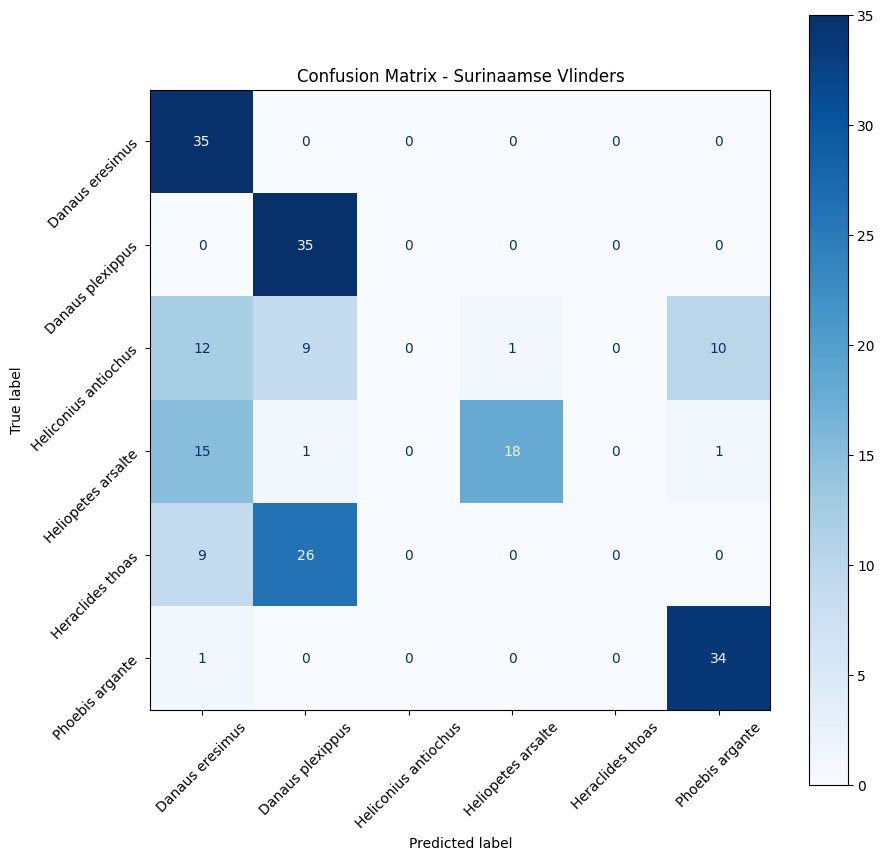

In [55]:
# Confusion Matrix voor Tensorflow Lite model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
import datetime

# Obtain the latest saved model path
modelSavedPath = get_last_modified_model(modelTFLitePath)

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=modelSavedPath)

print(interpreter.get_signature_list())

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input details:", input_details)
print("Output details:", output_details)

# Extract model parameters
input_shape = input_details[0]['shape']
print(f"Expected input shape: {input_shape}")

# Check if model is quantized
is_quantized = input_details[0]['quantization'] != (0.0, 0)
if is_quantized:
    input_scale, input_zero_point = input_details[0]['quantization']
    output_scale, output_zero_point = output_details[0]['quantization']
    print(f"Model is quantized: input scale={input_scale}, zero point={input_zero_point}")

# Create validation dataset with proper preprocessing
val_ds_for_predictions = tf.keras.utils.image_dataset_from_directory(
    testButterflyImages,
    image_size=(input_shape[1], input_shape[2]),  # Match model's expected dimensions
    shuffle=False,
    batch_size=1  # Process one image at a time for simplicity
)

# Optimize dataset for performance
val_ds_for_predictions = val_ds_for_predictions.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Collect true labels first (since we'll consume the dataset)
true_labels = np.concatenate([y.numpy() for _, y in val_ds_for_predictions], axis=0)
print("True labels (true_labels):", true_labels)

# Reset dataset
val_ds_for_predictions = tf.keras.utils.image_dataset_from_directory(
    testButterflyImages,
    image_size=(input_shape[1], input_shape[2]),
    shuffle=False,
    batch_size=1
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Allocate tensors (needed after getting details)
interpreter.allocate_tensors()

# Store predictions
y_pred = []

# Process each image
for image_batch, _ in val_ds_for_predictions:
    # Prepare input data (no need to resize again)
    input_data = image_batch.numpy().astype(np.float32)

    # Apply quantization if needed
    if is_quantized:
        input_data = input_data / input_scale + input_zero_point
        input_data = input_data.astype(input_details[0]['dtype'])

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Dequantize output if needed
    if is_quantized and output_scale != 0:
        output_data = (output_data.astype(np.float32) - output_zero_point) * output_scale

    # Get predicted class
    prediction = np.argmax(output_data[0])
    print(prediction)
    y_pred.append(prediction)

# Convert to numpy array
y_pred = np.array(y_pred)
print("Predicted labels (y_pred):", y_pred)

# Create confusion matrix
cm = confusion_matrix(true_labels, y_pred)

# Visualize confusion matrix

class_names = list(categories)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# fig, ax = plt.subplots(figsize=(10, 10))
# disp.plot(cmap=plt.cm.Blues, ax=ax)
# plt.title('Confusion Matrix - Surinaamse Vlinders')
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
# plt.show()
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

# Save the confusion matrix
currentTime = datetime.datetime.now()
modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")
plt.savefig(f"{confusionMatricesImagesPath}_confusion_matrix_{modelDateTrained}.png")
